# Importing Libraries


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing Datasets

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
%cd /content/drive/MyDrive
!mkdir logistic_data

/content/drive/MyDrive
mkdir: cannot create directory ‘logistic_data’: File exists


In [39]:
!pwd

/content/drive/MyDrive


In [40]:
%cd logistic_data/

/content/drive/MyDrive/logistic_data


In [41]:
%cp /content/emnist-letters-train.csv /content/drive/MyDrive/logistic_data

cp: cannot stat '/content/emnist-letters-train.csv': No such file or directory


In [42]:
%cp /content/emnist-letters-test.csv /content/drive/MyDrive/logistic_data

cp: cannot stat '/content/emnist-letters-test.csv': No such file or directory


In [43]:
!ls

emnist-letters-test.csv  emnist-letters-train.csv


In [44]:
train_path = '/content/drive/MyDrive/logistic_data/emnist-letters-train.csv'
test_path = '/content/drive/MyDrive/logistic_data/emnist-letters-test.csv'

train = pd.read_csv (train_path,header=None)
test = pd.read_csv (test_path,header=None)

# Checking Imported Data

In [45]:
train.shape

(88800, 785)

In [46]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
test.shape

(14800, 785)

# Training Data

## Importing Data

In [48]:
# converting train DataFrame to array

train = np.array(train) 

# Getting X and Y arrays

X = train [:, 1:]
Y = train [:, 0] # first column is label

# Reshaping Y 

Y = Y.reshape((X.shape[0],1))

In [49]:
# test data

test_data = np.array(test)
Y_test = test_data [: , 0].reshape(test_data.shape[0],1)
X_test = test_data [: , 1:]


In [50]:
print(X.shape) # columns should be 784 since 28 * 28 = 784
print(Y.shape)
print(X_test.shape) # columns should be 784 since 28 * 28 = 784
print(Y_test.shape)

(88800, 784)
(88800, 1)
(14800, 784)
(14800, 1)


# Gradient Descent

In [51]:
# feature scaling

X = X / 255

pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# making Y 0 or 1 since Sigmoid Cost works for 0 or 1

Y_train = np.zeros((X.shape[0], 26))

for i in range(X.shape[0]):
  Y_train[i,Y[i]-1] = 1

pd.DataFrame(Y_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88795,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
88797,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [53]:
def logistic (X, Y , alpha, iteration):

  

  

  m = X.shape[0] # training set length

  theta = np.zeros( (X.shape[1] , 26) ) # initializing theta (26 columns because 26 alphabets)

  cost_list = [] # to store cost Function

  

  for z in range(iteration): 

     Z =  np.dot(X,theta)


   
     y_pred = 1 / ( 1 + np.exp(-Z) )   # hypothesis 

     

     cost = (np.sum((Y)*(np.log(y_pred)) + (1-Y) * np.log(1-y_pred))) * (-1/m)   # Cost Function
    
     theta = theta - (alpha/m) * ((np.dot(X.T,(y_pred - Y)) ) ) # calculating theta
     

     cost_list.append(cost) # updating cost Function list

        # to see if cost is decreasing

     if z % 10 == 0:
      print("Cost is", cost)
     

      

  return theta , cost_list

In [54]:
iteration = 100
alpha = 1


theta , cost_list = logistic (X, Y_train , alpha = alpha, iteration = iteration)


Cost is 18.021826694558612
Cost is 3.2163579677558176
Cost is 2.6058360176160593
Cost is 2.481674042257469
Cost is 2.4150376474124706
Cost is 2.370552962584544
Cost is 2.3376534638396005
Cost is 2.311972396407397
Cost is 2.291207057936604
Cost is 2.2739814405295364


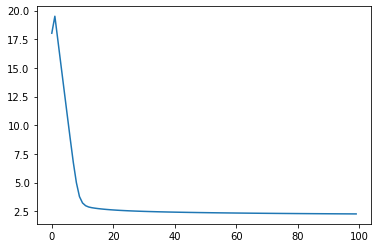

In [55]:
iter = np.arange( 0, iteration)
plt.plot(iter, cost_list)
plt.show()

# Running Test Data

In [56]:
# feature scaling
X_test = X_test / 255

pd.DataFrame(X_test)


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
Y_test

array([[ 1],
       [ 1],
       [ 1],
       ...,
       [19],
       [19],
       [19]])

In [58]:
Y_pred_test = (1 / ( 1 + np.exp( - ( np.dot(X_test,theta)) ) ) ) # hypothesis

pd.DataFrame(Y_pred_test)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.114115,0.008943,2.434842e-04,0.000067,0.262220,0.126402,0.023452,0.036124,0.000010,7.277979e-08,...,0.010641,0.014184,0.000362,0.013384,0.004138,0.001507,0.004611,0.005905,0.003886,0.000013
1,0.087569,0.004393,2.915436e-07,0.034630,0.000009,0.000131,0.003326,0.080342,0.000973,1.455404e-03,...,0.001270,0.000266,0.000539,0.000481,0.001514,0.001830,0.023112,0.339235,0.006292,0.001490
2,0.540332,0.000589,1.429996e-01,0.000455,0.029512,0.000219,0.314304,0.015416,0.000373,4.465810e-02,...,0.193168,0.005044,0.086682,0.001118,0.263304,0.003992,0.003478,0.001240,0.000355,0.013424
3,0.018286,0.000136,7.863443e-04,0.012517,0.000165,0.000025,0.179680,0.000275,0.000003,7.398724e-03,...,0.384943,0.000062,0.036243,0.000008,0.088433,0.000018,0.000649,0.000010,0.000006,0.000059
4,0.308083,0.037802,5.198331e-03,0.045353,0.001447,0.011278,0.122086,0.207182,0.000218,1.117148e-03,...,0.119253,0.015783,0.002488,0.001042,0.098757,0.001449,0.000474,0.026965,0.000198,0.094033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14795,0.364367,0.267842,4.663714e-02,0.065128,0.026074,0.000009,0.039849,0.016444,0.005456,2.098344e-01,...,0.002591,0.000550,0.387991,0.001021,0.019147,0.000036,0.003270,0.001495,0.000092,0.180914
14796,0.085413,0.212832,1.749436e-02,0.055416,0.079323,0.001519,0.236107,0.053208,0.007588,1.573850e-02,...,0.055419,0.003419,0.909495,0.012752,0.010802,0.000218,0.000313,0.018793,0.000722,0.134456
14797,0.010805,0.036581,1.015808e-03,0.000905,0.013682,0.000055,0.040744,0.000581,0.000017,5.992283e-03,...,0.002448,0.000085,0.623189,0.000630,0.000252,0.000008,0.000002,0.000035,0.000055,0.000440
14798,0.020856,0.095130,1.934865e-02,0.038547,0.003945,0.000113,0.062033,0.003089,0.003464,9.556697e-01,...,0.000637,0.000114,0.455922,0.007510,0.003063,0.000490,0.000116,0.003364,0.005563,0.009063


In [59]:
Y_pred_test.shape

(14800, 26)

In [60]:
max_prob = np.argmax(Y_pred_test, axis = 1)
pd.DataFrame(max_prob)

,0
0,4
1,23
2,0
3,16
4,0
...,...
14795,14
14796,18
14797,18
14798,9


In [61]:
# getting the index of the highest probability that will correspond to the actual Y predicted

Y_pred_final = max_prob +1

In [62]:
pd.DataFrame(Y_pred_final)

,0
0,5
1,24
2,1
3,17
4,1
...,...
14795,15
14796,19
14797,19
14798,10


In [63]:
i = 0

pred_data = 0

for i in range(Y_test.shape[0]):

  if Y_pred_final[i,] == Y_test[i,]:  # comparing Y_pred with Y_test
    pred_data = pred_data + 1

In [64]:
total_data = Y_test.shape[0]

print(pred_data)

9603


In [65]:
accuracy = (pred_data / total_data) * 100

print("Accuracy is", accuracy , "%")

Accuracy is 64.88513513513513 %
